In [8]:
%pylab inline

from reproject import reproject_interp
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, AsinhStretch, MinMaxInterval

from glob import glob


Populating the interactive namespace from numpy and matplotlib


/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
bdir = '/net/wien/data/users/balbinot/widebin/Fornax/'
refimg = bdir+'E/jcb007fjq_drc.chip1.fits'

others = glob(bdir+'E/*drc.chip1.fits')

In [41]:
hduref = fits.open(refimg)[0]

hdu = []
for f in others:
    hdu += [fits.open(f)[0]]

/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/astropy/wcs/wcs.py:654: FITSFixedWarning: 'datfix' made the change 'Invalid parameter value: inconsistent date '2014-06-22''.
  FITSFixedWarning)


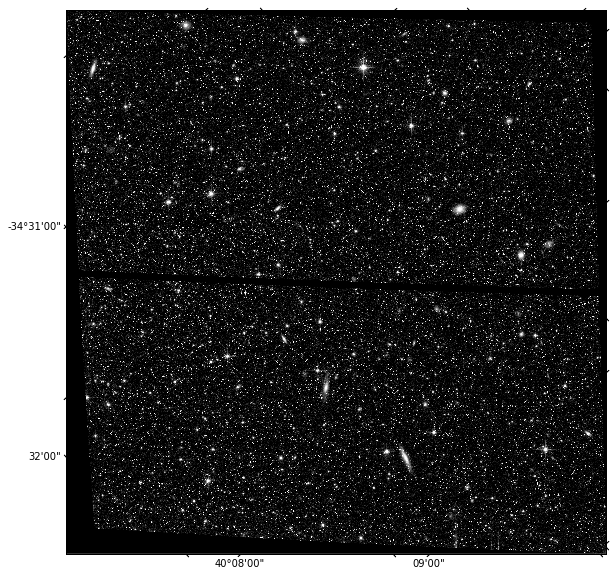

In [42]:
figure(figsize=(10,10))
subplot(111, projection=WCS(hduref.header))
norm = ImageNormalize(hduref.data, vmin=0, vmax=300, stretch=AsinhStretch())
imshow(hduref.data, norm=norm, cmap=cm.gray)

In [43]:
from reproject import reproject_interp

rep = []
repf = []
for h in hdu:
    H = reproject_interp(h, hduref.header)
    rep += [H[0]]
    repf += [H[1]]

/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/astropy/wcs/wcs.py:654: FITSFixedWarning: 'datfix' made the change 'Invalid parameter value: inconsistent date '2014-06-22''.
  FITSFixedWarning)
/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/astropy/wcs/wcs.py:654: FITSFixedWarning: 'datfix' made the change 'Invalid parameter value: inconsistent date '2014-06-21''.
  FITSFixedWarning)


/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/astropy/wcs/wcs.py:654: FITSFixedWarning: 'datfix' made the change 'Invalid parameter value: inconsistent date '2014-06-22''.
  FITSFixedWarning)
/Software/users/modules/7/software/anaconda3/5.3.0/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median for 1178385 results
  r = func(a, **kwargs)


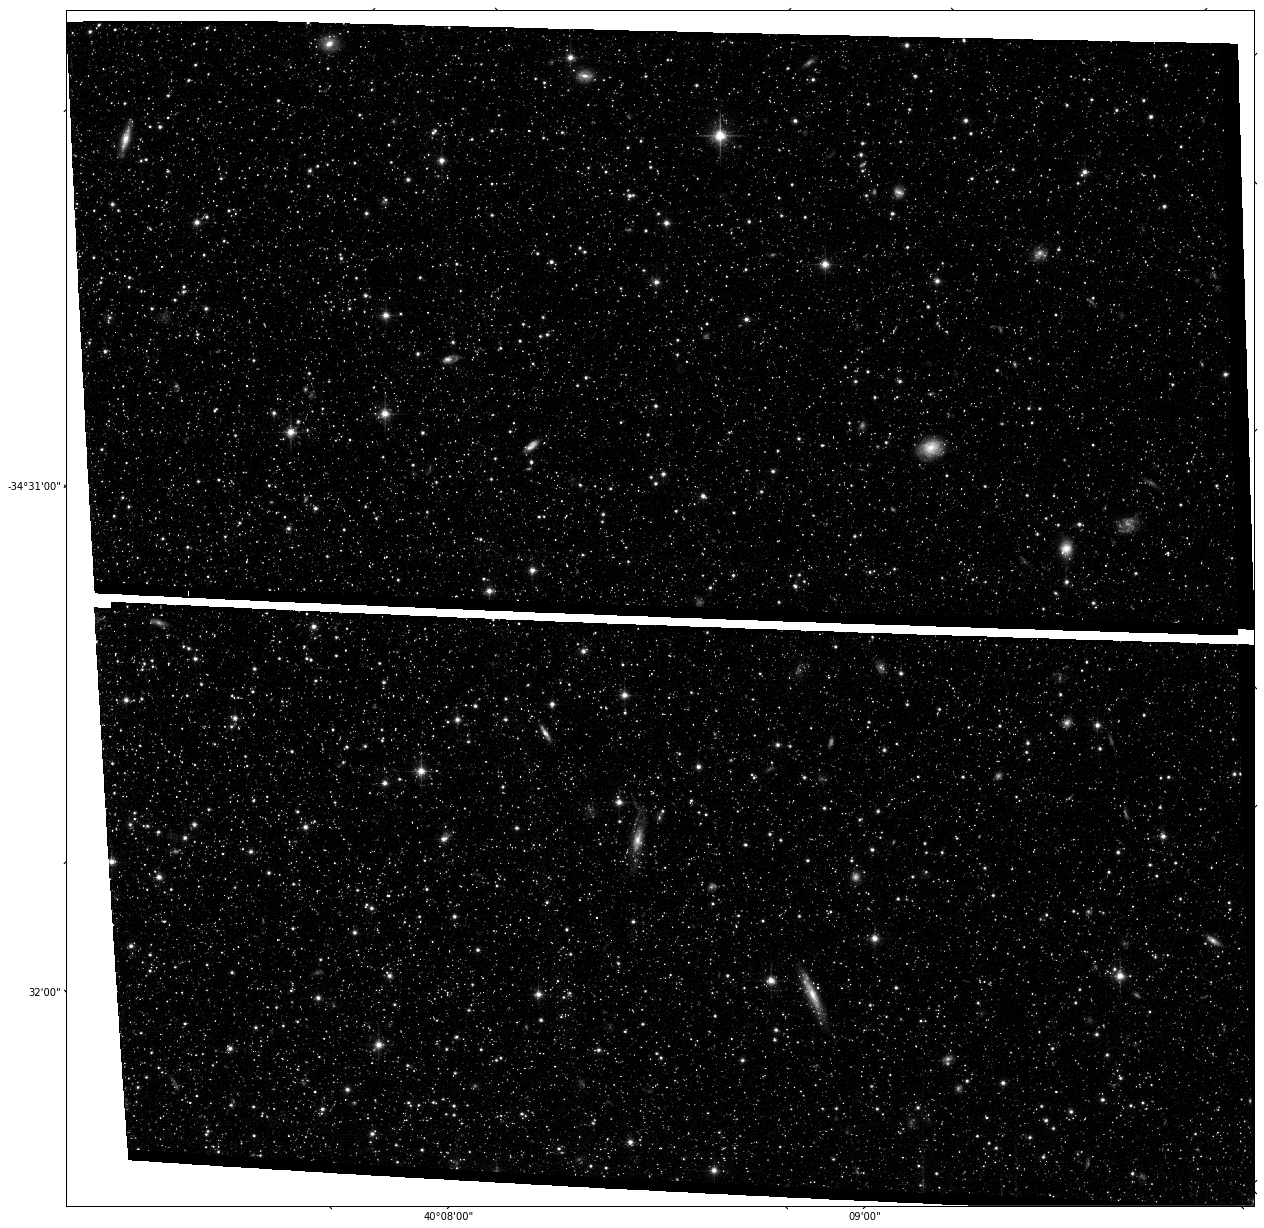

In [44]:
figure(figsize=(22, 22))
subplot(111, projection=WCS(hduref.header))

t = np.array(rep)
np.median(t, axis=0).shape

tf = np.array(repf)
exp = np.sum(tf, axis=0)

meanimg = np.median(t, axis=0)
norm = ImageNormalize(meanimg, vmin=0, vmax=300, stretch=AsinhStretch())
imshow(meanimg, norm=norm, cmap=cm.gray)

#imshow(meanimg/exp, cmap=cm.gray, vmin=0)
#colorbar()

In [45]:
nhdu = fits.PrimaryHDU(meanimg, header=hduref.header)
hdul = fits.HDUList([nhdu])
hdul.writeto('combined.fits')